# Machine Learning Pipeline applied to recommender system using [MovieLens](https://movielens.org)

In [96]:
# TODO: add imports
import numpy as np
import pandas as pd
import os
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Acquisition

In [97]:
# TODO: download the smallest movie lens dataset and load. Using relative paths and os.path.join
# TODO: After loading display the first few lines (head) and the variable structure (info)
file_path = os.path.join("..","data", "movies.csv")
movies = pd.read_csv(file_path)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
file_path = os.path.join("..","data", "ratings.csv")
ratings = pd.read_csv(file_path)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [99]:
#Gives information about the variables
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [100]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Data exploration

In [101]:
# TODO: For each of the below tasks create a new code cell and research how to do it.
# TODO: Display statistics of each variable (describe)
# TODO: Display total number of nulls per variable

In [102]:
#Using the describe function to check for the statistics of the variables
movies_describe = movies.describe(include=['object','int64'])
print(movies_describe)

              movieId        title genres
count     9742.000000         9742   9742
unique            NaN         9737    951
top               NaN  Emma (1996)  Drama
freq              NaN            2   1053
mean     42200.353623          NaN    NaN
std      52160.494854          NaN    NaN
min          1.000000          NaN    NaN
25%       3248.250000          NaN    NaN
50%       7300.000000          NaN    NaN
75%      76232.000000          NaN    NaN
max     193609.000000          NaN    NaN


In [103]:
ratings_describe = ratings.describe()
print(ratings_describe)

              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


In [104]:
#Checking for null values
null_counts = movies.isnull().sum()
print(null_counts)

movieId    0
title      0
genres     0
dtype: int64


In [105]:
null_counts = ratings.isnull().sum()
print(null_counts)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [106]:
#Drop Duplicates
duplicates = movies[movies.duplicated(['title'], keep=False)]
print(duplicates)
#Drop the duplicates
movies.drop_duplicates(subset=['title'], inplace=True)

      movieId                                   title  \
650       838                             Emma (1996)   
2141     2851                         Saturn 3 (1980)   
4169     6003  Confessions of a Dangerous Mind (2002)   
5601    26958                             Emma (1996)   
5854    32600                             Eros (2004)   
5931    34048                War of the Worlds (2005)   
6932    64997                War of the Worlds (2005)   
9106   144606  Confessions of a Dangerous Mind (2002)   
9135   147002                             Eros (2004)   
9468   168358                         Saturn 3 (1980)   

                                   genres  
650                  Comedy|Drama|Romance  
2141            Adventure|Sci-Fi|Thriller  
4169          Comedy|Crime|Drama|Thriller  
5601                              Romance  
5854                                Drama  
5931     Action|Adventure|Sci-Fi|Thriller  
6932                        Action|Sci-Fi  
9106  Comedy|Crime|D

In [107]:
dup_remove = movies.drop_duplicates(subset=['title'], inplace=True)

In [108]:
#Merging movies with ratings
data = pd.merge(movies, ratings, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [109]:
# #Drop unecessary tables
df = pd.DataFrame(data)
newdf = df.drop(["userId"] , axis = 'columns')
newdf.head()

,movieId,title,genres,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483


In [110]:
# Extract the release year from the title using string manipulation
release_years = []
for title in newdf['title']:
    year_str = title[-5:-1]  # Extract the last 4 characters of the title
    if year_str.isdigit():
        release_year = int(year_str)
    else:
        release_year = None
    release_years.append(release_year)

# Replace NaN values with None
release_years = [year if pd.notnull(year) else None for year in release_years]

# Add the release year as a new column to the movies DataFrame
newdf['release year'] = release_years

# Convert the release year column to integer type
newdf['release year'] = newdf['release year'].astype('Int64')

# Print the first few rows of the movies DataFrame
print(newdf.head())


   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   rating   timestamp  release year  
0     4.0   964982703          1995  
1     4.0   847434962          1995  
2     4.5  1106635946          1995  
3     2.5  1510577970          1995  
4     4.5  1305696483          1995  


In [111]:
#Now we want to remove the release year from the title column 

# Remove the release year from the title column using string manipulation
newdf['title'] = newdf['title'].str.replace(r'\s\(\d{4}\)', '', regex=True)

# Print the first few rows of the movies DataFrame
newdf.head()


,movieId,title,genres,rating,timestamp,release year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483,1995


# Data Visualisation

In [112]:
# TODO: Display frequencies per variable (matplotlib histograms)
# TODO: Display boxplots per variable
# TODO: Display the corrleation values and plot for each variable

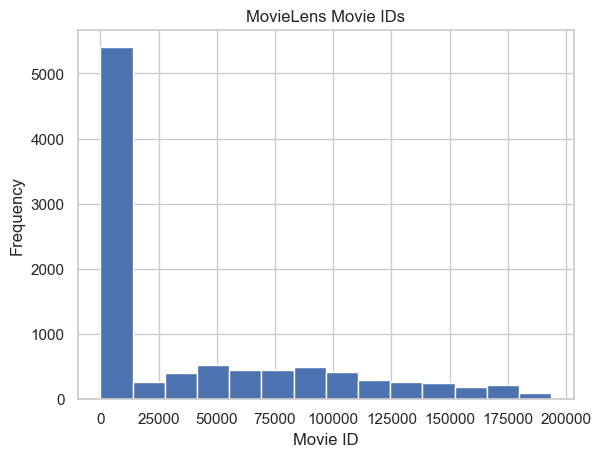

In [113]:
#Frequency for movieId 
plt.hist(movies['movieId'], bins=14)
plt.title('MovieLens Movie IDs')
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.show()

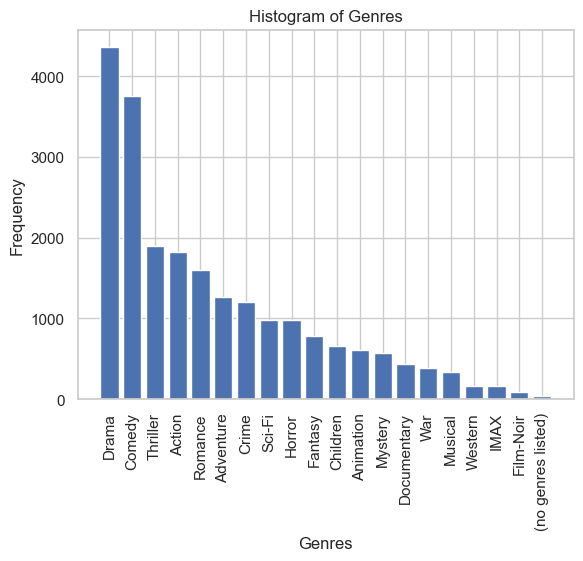

In [114]:
# Create a list of all the genres
genres_list = movies['genres'].str.split('|')
genres = genres_list.explode()

#Genres
genres_counts = genres.value_counts()
plt.bar(genres_counts.index, genres_counts.values)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Histogram of Genres')
plt.xticks(rotation=90)
plt.show()


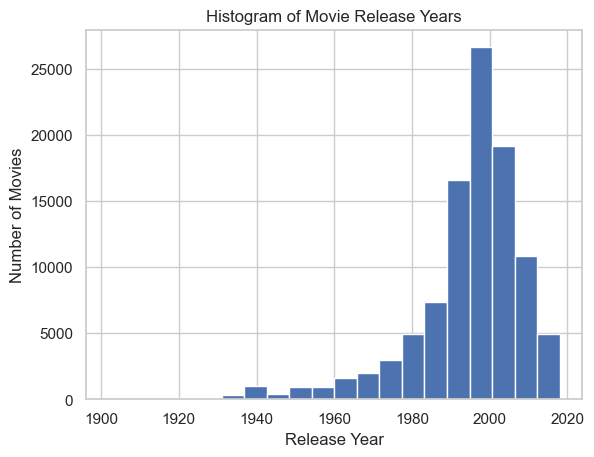

In [115]:
# Plot the histogram
plt.hist(newdf['release year'].dropna(), bins=20)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Histogram of Movie Release Years')
plt.show()

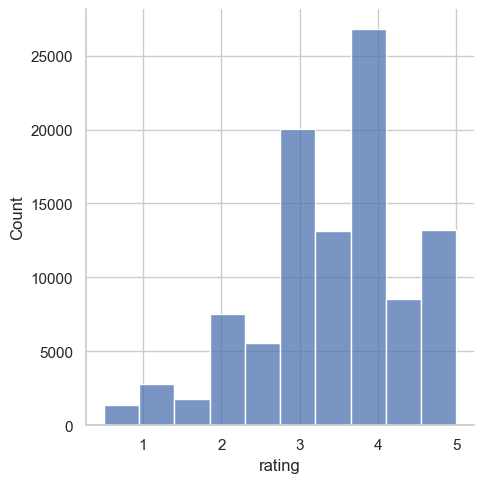

In [116]:
#Count of Ratings
sns.set_theme(style="whitegrid")
sns.displot(ratings, x="rating", bins=10, color="b")

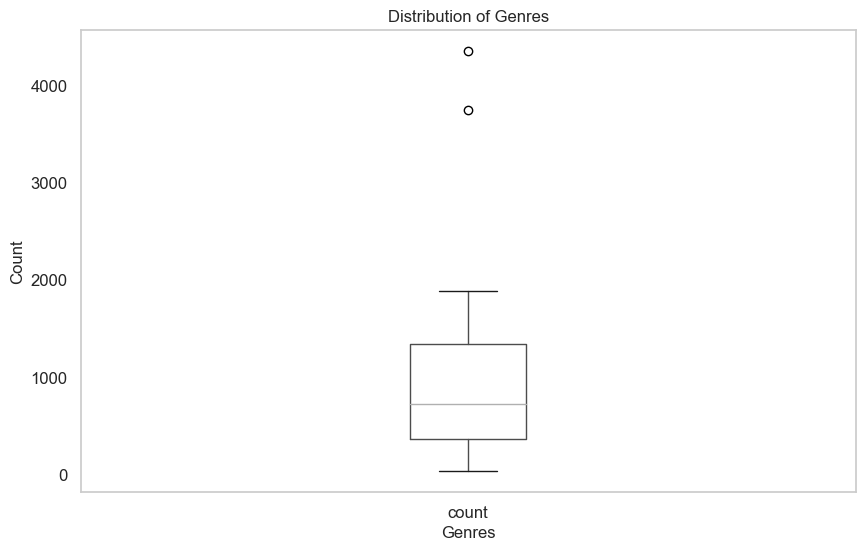

In [117]:
# Count the number of movies in each genre
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()

# Create a new dataframe with the genre counts
genres_df = pd.DataFrame({'genre': genre_counts.index, 'count': genre_counts.values})

# Plot a boxplot graph of the genre counts
plt.figure(figsize=(10,6))
genres_df.boxplot('count', grid=False, fontsize=12)
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()



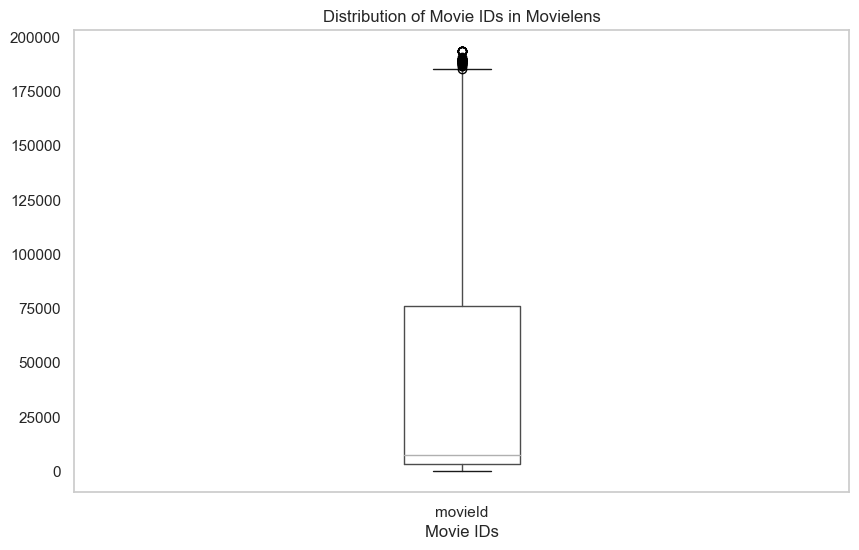

In [118]:
# Plot a boxplot graph of the movieid values
plt.figure(figsize=(10,6))
movies.boxplot(grid=False)
plt.title('Distribution of Movie IDs in Movielens')
plt.xlabel('Movie IDs')
plt.show()


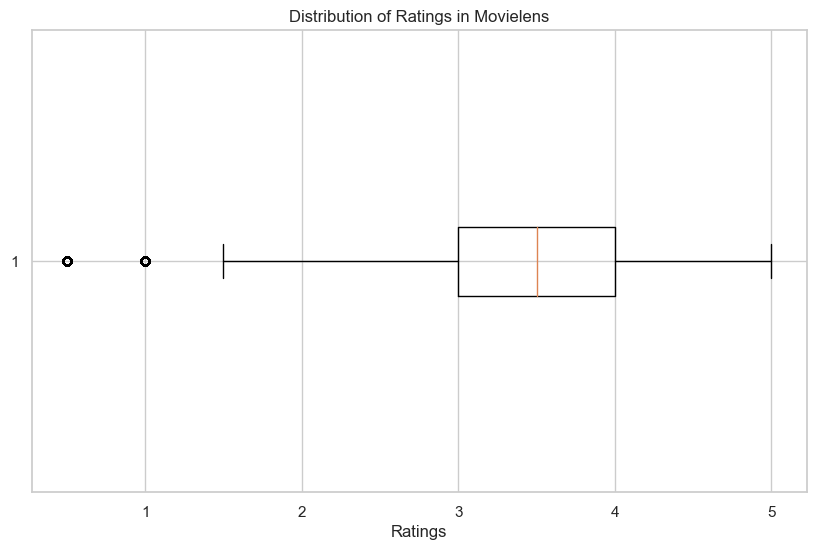

In [119]:
#Ratings
plt.figure(figsize=(10,6))
plt.boxplot(ratings['rating'], vert=False)
plt.title('Distribution of Ratings in Movielens')
plt.xlabel('Ratings')
plt.show()


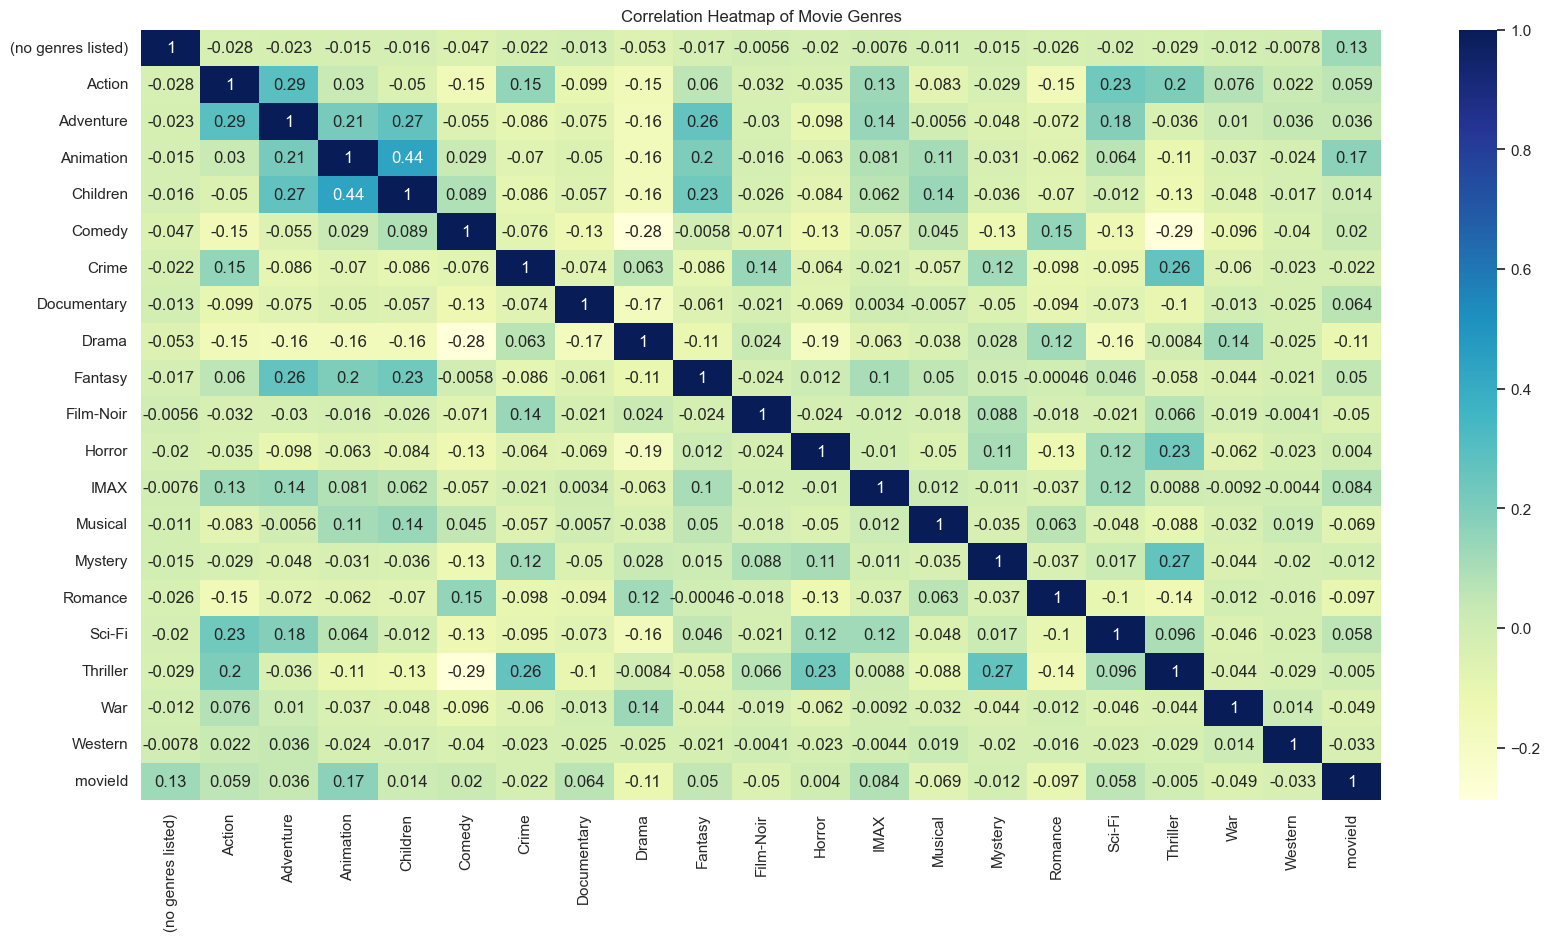

In [126]:
#The get_dummies is used for converting the strings into binary
genres_df = movies['genres'].str.get_dummies(sep='|')
genres_df['movieId'] = movies['movieId']
corr = genres_df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap of Movie Genres')
plt.show()

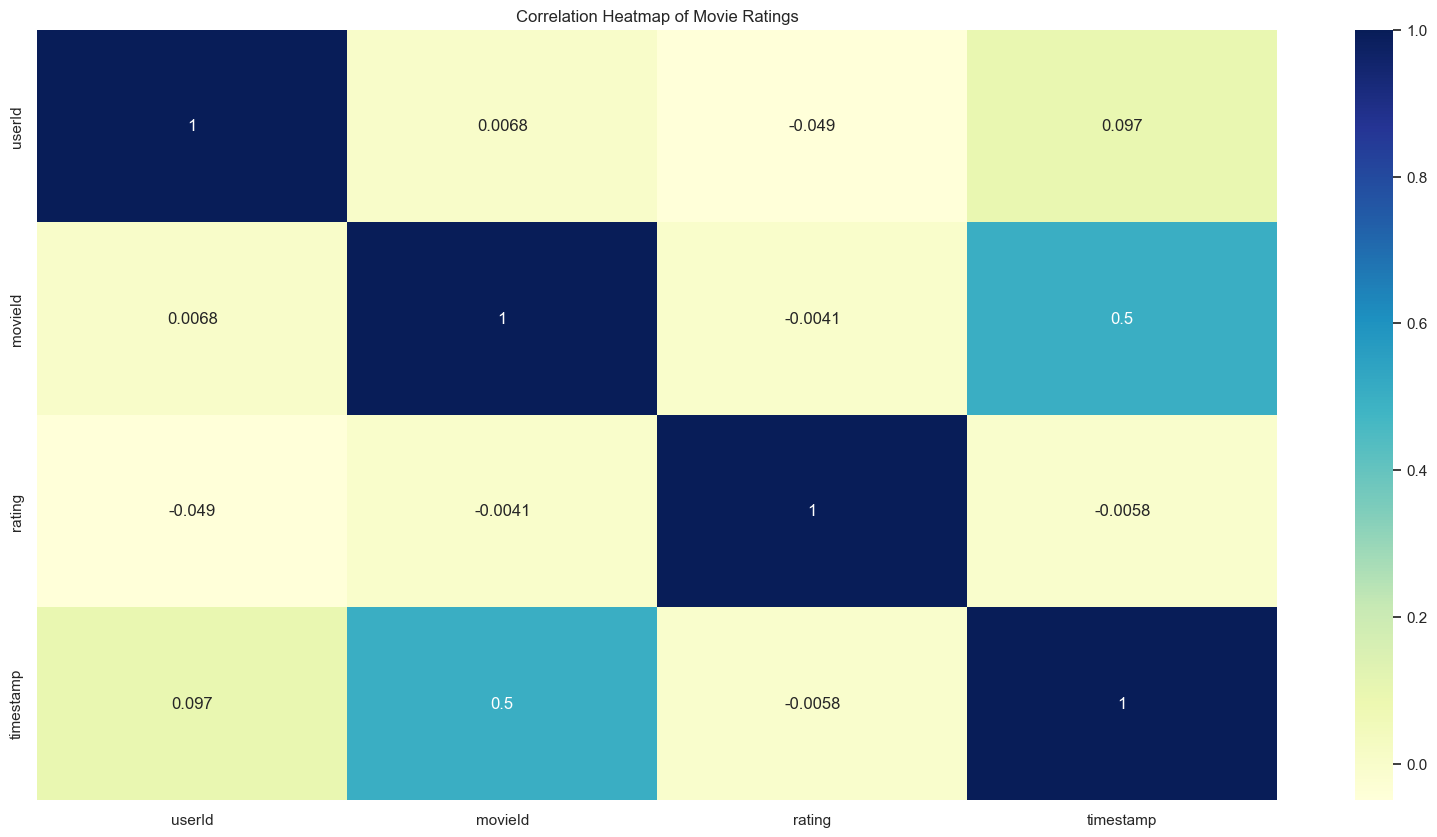

In [125]:
ratings_df = ratings['rating'].astype(int)
ratings['rating'] = ratings['rating']
corr = ratings.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap of Movie Ratings')
plt.show()

# Data Cleaning

In [ ]:
# TODO: remove any nulls
# TODO: Identify any problematic values (Title of movies, some movies have same name and release year, you need to research this situation and address accordingly)
# Arranged the duplicates in the above section as I merged the tables

In [ ]:
#remove any nulls
df_movies = pd.DataFrame(newdf)
df_movies.dropna(inplace=True)
df_movies.head()

,movieId,title,genres,rating,timestamp,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483,1995


# Data Transformation

In [ ]:
# TODO: At a later stage, not first iteration of this attempt, you might want to consider researching what PCA is.
# TODO: Consider manipulating some variables, such as the review date and calculate the number of years from the movie release year to the review date
# What i want from this is put the release year into a timestamp and the review date which is in a timestamp already 
#Then review date(timestamp) - release year(timestamp)

# Data Splitting

In [ ]:
# TODO: Split the data in different ratios (70:30, 80:20, 90:10) then run the experiments. This will allow you to answer a research question: What impact does the train to test split ratio have on the model.
# TODO: At a later point in time (even third year) you might want to consider different cross validation techniques (https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right)

# Model training

In [ ]:
# TODO: create a model that recommends a movie given certain parameters. The most naive would be the general movie average rating, then you can add other factors, such as genre, release year, etc etc.
# TODO: at a later point in time, introduce a different algorithm.
# TODO: at an even later point in time, consider an advanced technique. https://medium.com/stanford-cs224w/graph-neural-network-based-movie-recommender-system-5876b9686df3

# Model evaluation

In [ ]:
# TODO: evaluate each model and generate metric results. Answer the research question: which model performs better in a specific situation?

# Post-Processing

This is an advanced step and does not necessarily need to be done in 2nd year, yet it is good that you know that it exists. You can, but are not obliged to do so, consider for 3rd year.

In [ ]:
# TODO: Assess the incorrect recommendations and investigate to answer the research question: Which recommendations were bad and why did they occur?